#### Import libraries and set visualization options

In [ ]:
# Import libraries
import os 
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns


# Set visualization options
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 500)

from itables import init_notebook_mode, show
init_notebook_mode(all_interactive=True)

#### Create analysis folders

In [ ]:
# Define function for creating analysis folders

def create_analysis_folder(operating_system, project_name, analysis_name):
	
	# Set path to BSC folder for mac, linux and windows
	if operating_system == 'windows':
		pathToBSCfolder = 'Z:\\'
	elif operating_system == 'linux':
		pathToBSCfolder = os.path.join('/home','amontaner','BSC')
	elif operating_system == 'mac':
		pathToBSCfolder = os.path.join('/Users','annamontaner','Documents','BSC3')
	else:
		print ('undefined operating system') 
	
	# Path to project folder 
	project_folder = os.path.join('scratch','cli79','cli79334','projects', 'other', project_name)


   # Create analysis folder and subfolders 
	analysis_folder = os.path.join(pathToBSCfolder, project_folder, analysis_name)
	analysis_info_folder = os.path.join(analysis_folder,'analysis_info')
	intermediate_folder = os.path.join(analysis_folder,'intermediate_files')
	assets_folder = os.path.join(analysis_folder,'assets')
	final_folder = os.path.join(analysis_folder,'final_files')


	folder_list = [analysis_folder,
				   analysis_info_folder, 
				   assets_folder, 
				   intermediate_folder, 
				   final_folder]

	if not os.path.exists(analysis_folder):
		for items in folder_list:
			os.makedirs(items)
		print("Analysis folder and subfolders created '{}' created".format(analysis_name))
	else: 
		print("Already existing analysis '{}' ".format(analysis_name))
	
	return(analysis_folder)

In [ ]:
# Create analysis folders
analysis_folder = create_analysis_folder('mac','pharmGKB', '03_pharmGKB_annotated_data_exploration')	

#### Import PharmGKB annotated data

In [ ]:
# Define function for data import

def import_annotated_data(analysis_folder, tsvFile):

    data = pd.read_csv(os.path.join(analysis_folder, tsvFile), sep='\t', low_memory=False)    
    colsToConvert = ['AF','AC','NS','AN','EAS_AF','EUR_AF','AFR_AF','AMR_AF','SAS_AF', 'dbNSFP_1000Gp3_AF', 'dbNSFP_1000Gp3_EUR_AF', 'dbNSFP_1000Gp3_AFR_AF', 'dbNSFP_1000Gp3_AMR_AF', 'dbNSFP_1000Gp3_EAS_AF', 'dbNSFP_1000Gp3_SAS_AF', 'dbNSFP_ESP6500_EA_AF', 'dbNSFP_ESP6500_AA_AF', 'dbNSFP_ExAC_AF', 'dbNSFP_ExAC_NFE_AF', 'dbNSFP_ExAC_AFR_AF', 'dbNSFP_ExAC_AMR_AF', 'dbNSFP_ExAC_EAS_AF', 'dbNSFP_ExAC_FIN_AF', 'dbNSFP_ExAC_SAS_AF', 'dbNSFP_ExAC_Adj_AF', 'dbNSFP_gnomAD_exomes_AF', 'dbNSFP_gnomAD_exomes_NFE_AF', 'dbNSFP_gnomAD_genomes_AF', 'dbNSFP_gnomAD_genomes_NFE_AF']
    data[colsToConvert] = data[colsToConvert].apply(lambda x: pd.to_numeric(x, errors='coerce'))
    return(data)

In [ ]:
# Import PharmGKB snpEff annotated data
d = import_annotated_data(analysis_folder,'mutations_pharmGKB_test2.tsv')


In [ ]:
data = d.copy()
data.shape[0]

#### Import ADME gene list

In [ ]:
pharmGKB_ADME = pd.read_csv(os.path.join(analysis_folder,'adme_gene_list.tsv'), sep="\t")
pharmGKB_ADME_list = list(set(pharmGKB_ADME['Gene Symbol']))

Add label ADME / not_ADME

In [ ]:
# Add ADME label
data['adme_label'] = ['ADME' if x in pharmGKB_ADME_list else 'not_ADME' for x in data['ANN[*].GENE']]

In [ ]:
set(data['adme_label'])

#### Group by different annotation categories

In [ ]:
# Group by ANN[*].BIOTYPE
group = data.groupby(['ANN[*].BIOTYPE']).size().reset_index(name='count')

# Calculate percentages
group['percentage'] = (group['count'] / group['count'].sum()) * 100

# Order 
group = group.sort_values('percentage',ascending=False)

# Export table
group.to_csv(os.path.join(analysis_folder,'assets','annotated_biotypes_pharmGKB.tsv'), index=False)


# Plot
plt.figure(figsize=(6, 4))

sns.barplot(group, x="ANN[*].BIOTYPE", y='percentage', color = 'grey')
plt.xticks(rotation=90) 
plt.xlabel("ANN[*].BIOTYPE")
plt.ylabel("%")

plt.savefig(os.path.join(analysis_folder,'assets','annotated_biotypes_pharmGKB.pdf'), dpi=300)
plt.show()

In [ ]:
# Group by ANN[*].BIOTYPE AND ADME
group = data.groupby(['adme_label','ANN[*].BIOTYPE']).size().reset_index(name='count')
# Calculate percentages
group['percentage'] = (group['count'] / group['count'].sum()) * 100

# Order 
group = group.sort_values('percentage',ascending=False)

# Export table
group.to_csv(os.path.join(analysis_folder,'assets','annotated_biotypes_ADME_label_pharmGKB.tsv'), index=False)

In [ ]:
# Group by ANN[*].BIOTYPE and ANN[*].EFFECT
group = data.groupby(['adme_label','ANN[*].BIOTYPE','ANN[*].EFFECT']).size().reset_index(name='count')

# Calculate percentages
group['percentage'] = (group['count'] / group['count'].sum()) * 100

# Export table
group.to_csv(os.path.join(analysis_folder,'assets','annotated_adme_biotypes_and_effects_pharmGKB.tsv'), index=False)

/opt/homebrew/Caskroom/miniforge/base/envs/ersilia/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/opt/homebrew/Caskroom/miniforge/base/envs/ersilia/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/opt/homebrew/Caskroom/miniforge/base/envs/ersilia/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/opt/homebrew/Caskroom/miniforge/base/envs/ersilia/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: 

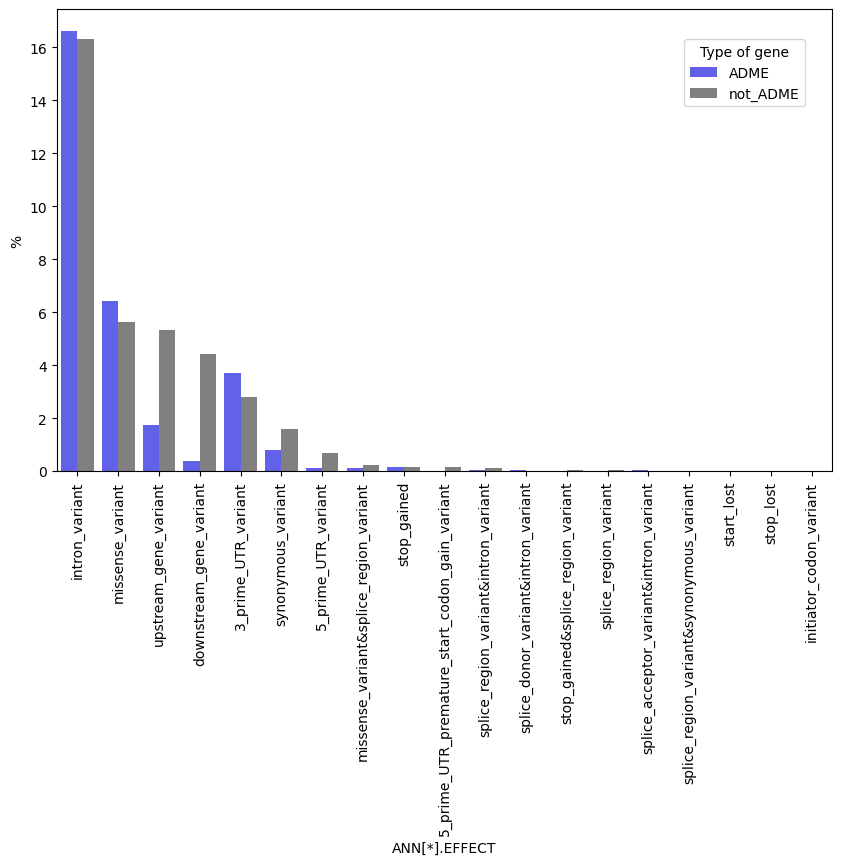

In [170]:
# Subset protein coding
protein_coding = group[group['ANN[*].BIOTYPE']=='protein_coding']

# Group by 'ANN[*].BIOTYPE' and 'adme_label' and calculate the mean percentage
grouped_protein_coding = protein_coding.groupby(['ANN[*].EFFECT', 'adme_label'], as_index=False)['percentage'].mean()

# Set custom colors for the legend
custom_palette = {'ADME': '#4C4CFF', 'not_ADME': 'grey'} 

# Plot
plt.figure(figsize=(10, 6))
ax = sns.barplot(data=grouped_protein_coding.sort_values(by='percentage', ascending=False), x='ANN[*].EFFECT', y='percentage', hue='adme_label', palette=custom_palette)
plt.xticks(rotation=90) 
plt.xlabel("ANN[*].EFFECT")
plt.ylabel("%")
ax.legend(title='Type of gene', bbox_to_anchor=(0.8, 0.95))
plt.show()